# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [5]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,499,91,8030483,7569213,128.767927,121.371512
1,강동구,369,21,2890053,2830506,99.161194,97.118065
2,강북구,413,67,4825181,4671783,133.020373,128.791504
3,강서구,566,49,4681083,4652828,88.119480,87.587591
4,관악구,466,86,7655819,7792476,154.753674,157.516040


In [6]:
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving.head()

,Unnamed: 0,도착 시군구 코드,평균 이동 시간(분)_mean,이동인구(합)_mean,평균 이동 시간(분)_sum,이동인구(합)_sum
0,0,11010,21.443330,41.523063,25054790,23348702.47
1,1,11020,21.166269,41.760859,25420020,24069263.49
2,2,11030,21.553622,34.676168,22930100,17859244.44
3,3,11040,21.950757,39.907793,22638220,20504230.90
4,4,11050,22.779081,43.712430,22875800,21538032.05


In [7]:
# df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
# df_seoul_business.head()

In [8]:
# df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')
# df_seoul_people.head()

In [9]:
df = pd.merge(standard,df_seoul_bus_station,how='inner', on='자치구')

In [10]:
df = pd.merge(df,df_seoul_moving,how='inner', on='도착 시군구 코드')

In [11]:
# df = pd.merge(df,df_seoul_business,how='inner', on='자치구')

In [12]:
# df = pd.merge(df,df_seoul_people,how='inner', on='자치구')

In [13]:
df.head()

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,Unnamed: 0,평균 이동 시간(분)_mean,이동인구(합)_mean,평균 이동 시간(분)_sum,이동인구(합)_sum
0,11010,종로구,349,106,5468935,5205394,131.889620,125.534028,0,21.443330,41.523063,25054790,23348702.47
1,11020,중구,178,103,3776675,3598932,121.020124,115.324511,1,21.166269,41.760859,25420020,24069263.49
2,11030,용산구,323,67,4189977,4086474,137.891694,134.485421,2,21.553622,34.676168,22930100,17859244.44
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,3,21.950757,39.907793,22638220,20504230.90
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,4,22.779081,43.712430,22875800,21538032.05


In [14]:
df.corr()

,도착 시군구 코드,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,Unnamed: 0,평균 이동 시간(분)_mean,이동인구(합)_mean,평균 이동 시간(분)_sum,이동인구(합)_sum
도착 시군구 코드,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,1.000000,0.519835,0.609147,0.458570,0.521087
정류장수,0.447511,1.000000,0.258798,0.566681,0.578479,-0.135318,-0.099146,0.447511,0.219452,0.371133,0.341164,0.355891
노선수,-0.069435,0.258798,1.000000,0.665488,0.652642,0.493541,0.470440,-0.069435,-0.687405,-0.000111,0.326758,0.192467
승차총승객수,0.440756,0.566681,0.665488,1.000000,0.996610,0.538720,0.547384,0.440756,-0.130036,0.474137,0.599538,0.565898
하차총승객수,0.441705,0.578479,0.652642,0.996610,1.000000,0.534826,0.555137,0.441705,-0.115611,0.463993,0.583922,0.546476
승차평균승객수,0.017980,-0.135318,0.493541,0.538720,0.534826,1.000000,0.989288,0.017980,-0.388197,-0.075784,0.172877,0.054586
하차평균승객수,0.029956,-0.099146,0.470440,0.547384,0.555137,0.989288,1.000000,0.029956,-0.360495,-0.068577,0.166976,0.045508
Unnamed: 0,1.000000,0.447511,-0.069435,0.440756,0.441705,0.017980,0.029956,1.000000,0.519835,0.609147,0.458570,0.521087
평균 이동 시간(분)_mean,0.519835,0.219452,-0.687405,-0.130036,-0.115611,-0.388197,-0.360495,0.519835,1.000000,0.315440,-0.089307,0.089641
이동인구(합)_mean,0.609147,0.371133,-0.000111,0.474137,0.463993,-0.075784,-0.068577,0.609147,0.315440,1.000000,0.868397,0.961343


In [15]:
# (예시1) 정류장 수와 승차 총 승객수는 관계가 있다.

# H0 : 정류장 수와 승차 총 승객수는 연관이 없다.

# H1 : 정류장 수와 승차 총 승객수는 연관이 있다.
import scipy.stats as spst

spst.pearsonr(df['정류장수'],df['승차총승객수'])

# 강한 양의 상관관계
# p-value 0.05 기준  작으면 -> 귀무가설 기각,  크면 -> 대립가설 기각 
# 정류장수와 승차총승객수는 상관관계가 있다?


(0.5666813370974585, 0.003141977397117322)

In [16]:
#df['비율1'] = df['정류장수'] / df['승차총승객수'] * 10000
#df.sort_values(by=['비율1'])

In [17]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

# 로컬에서 사용하신다면 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# AIDU에서 사용하신다면 나눔 고딕

# plt.rc('font', family='nanum')
# sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
#         rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
#         style='darkgrid')

# scipy
import scipy.stats as spst

<단계>
### 1.가설 수립 
### 가설을 설정해 봅시다 (조당 최소 3개) 
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

### 2.단변량 분석
### 3.이변량 분석

## 가설 1
: 승차 총 승객 수가 많은 구를 지나가는 노선이 많을 거다.

## 가설 2
: 평균 이동 시간(평균)이 길수록 노선 수가 적다.

##  가설 3
: (승차총승객수 / 정류장수)와 평균 이동 시간_mean은 양의 상관관계를 가질 것이다.




# 가설 1)
## 승차 총 승객 수가 많은 구를 지나가는 노선이 많을 거다

### 2. 단변량 분석

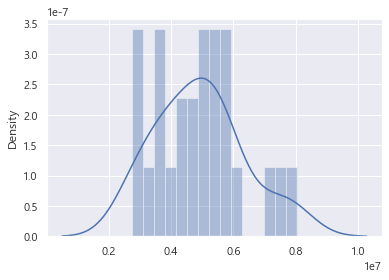

In [18]:
var = '승차총승객수'
target = '노선수'
sns.distplot(df[[var]], bins=15)
plt.show()

### 3.이변량 분석

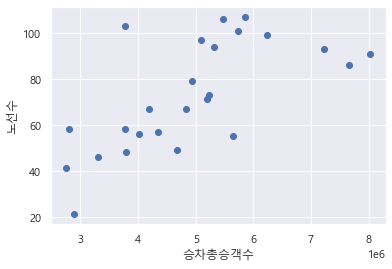

In [19]:
plt.scatter(var, target, data=df)
plt.xlabel(var)
plt.ylabel(target)
plt.show()

In [20]:
spst.pearsonr(df[var], df[target]) 

(0.6654877832095702, 0.0002830862285771981)

상관계수가 0.5보다 크므로 둘이 연관이 있다고 볼 수 있습니다

In [21]:
df['가설1비율'] = df['승차총승객수'] / df['노선수']
df.sort_values('가설1비율', ascending=False)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,Unnamed: 0,평균 이동 시간(분)_mean,이동인구(합)_mean,평균 이동 시간(분)_sum,이동인구(합)_sum,가설1비율
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,24,26.108477,59.889404,23098940,27105663.28,137621.571429
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,23,25.605607,77.326264,34089850,44746877.10,102577.127273
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,15,25.496986,54.208682,27716290,28240601.39,95532.306122
20,11210,관악구,466,86,7655819,7792476,154.753674,157.516040,20,23.842468,46.586809,24596940,22778465.15,89021.151163
22,11230,강남구,499,91,8030483,7569213,128.767927,121.371512,22,23.284573,83.309306,38253230,56486305.92,88247.065934
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,6,23.849072,38.086766,18798570,17210112.65,79011.270833
21,11220,서초구,600,93,7221330,6977950,126.687777,122.418028,21,22.959344,59.509766,32553130,36861470.19,77648.709677
10,11110,노원구,514,57,4353295,4292724,88.476211,87.245168,10,24.497542,51.091182,22185680,25040979.22,76373.596491
11,11120,은평구,501,71,5201660,5122499,106.395173,104.776007,11,25.066142,46.712972,20258090,20888187.38,73262.816901
8,11090,강북구,413,67,4825181,4671783,133.020373,128.791504,8,24.282441,36.281421,16995810,14415699.66,72017.626866


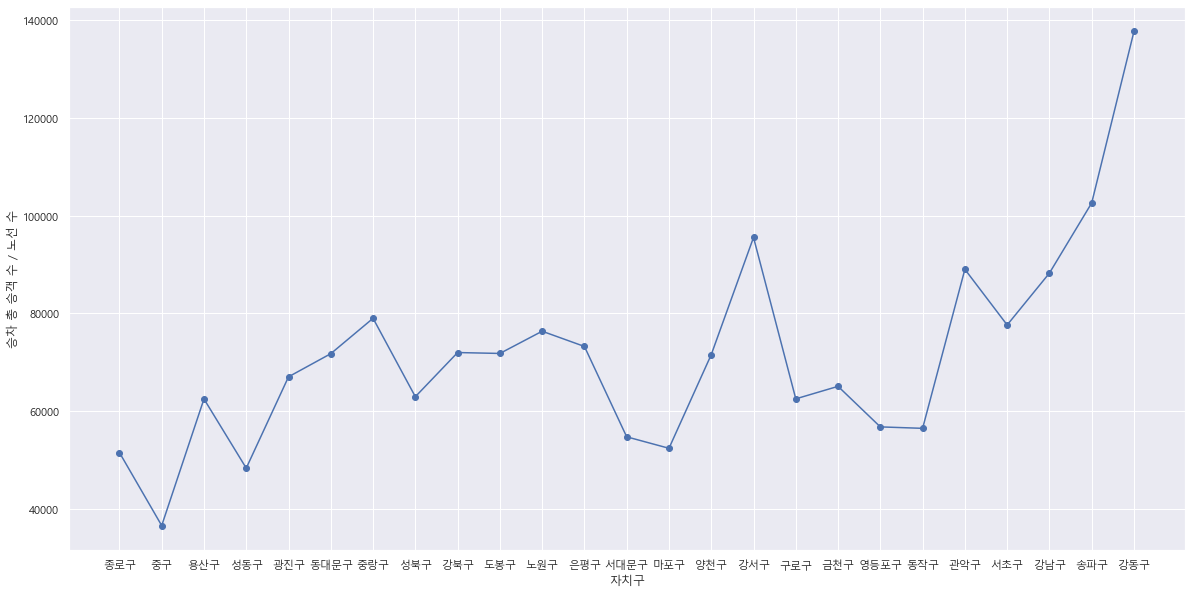

In [22]:
plt.figure(figsize=(20, 10))
plt.plot(df['자치구'], df['가설1비율'], 'o-')
plt.xlabel('자치구')
plt.ylabel('승차 총 승객 수 / 노선 수')
plt.show()

## 노선 수 대비 승차 총 승객 수가 많은 강동구에 노선 추가가 필요합니다.

# 가설 2)
## 평균 이동 시간(평균)이 길수록 노선 수가 적다.

### 2. 단변량 분석

In [23]:
df['평균 이동 시간(분)_mean'].describe()

count    25.000000
mean     23.333424
std       1.433409
min      21.166269
25%      22.215130
50%      23.233772
75%      24.394485
max      26.108477
Name: 평균 이동 시간(분)_mean, dtype: float64

In [24]:
df['노선수'].describe()

count     25.000000
mean      72.920000
std       23.808122
min       21.000000
25%       56.000000
50%       71.000000
75%       94.000000
max      107.000000
Name: 노선수, dtype: float64

<AxesSubplot:xlabel='평균 이동 시간(분)_mean', ylabel='Density'>

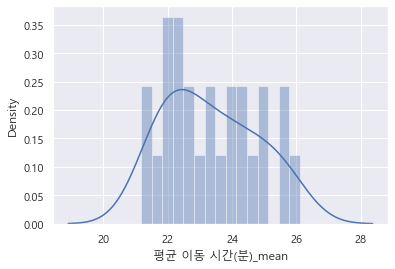

In [25]:
sns.distplot(df['평균 이동 시간(분)_mean'], bins=15)

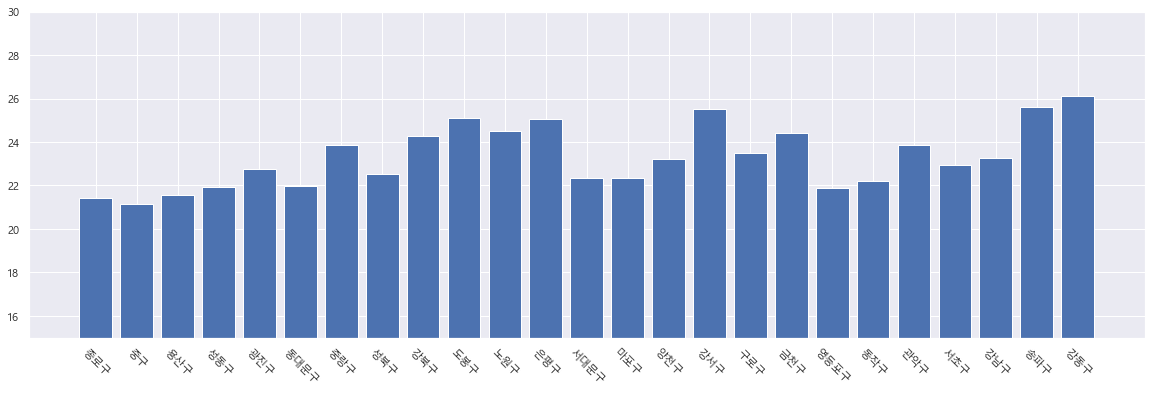

In [26]:
plt.figure(figsize=(20,6))
plt.bar(df['자치구'],df['평균 이동 시간(분)_mean'])
plt.xticks(rotation=-45)
plt.ylim(15,30)
plt.show()

### 3.이변량 분석

In [27]:
target = '노선수'

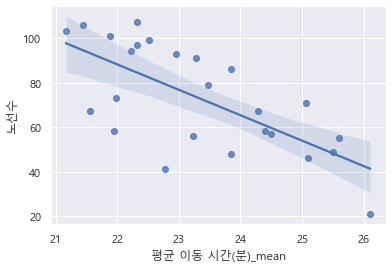

(-0.6874048303585873, 0.00014680687151646322)

In [28]:
sns.regplot(x=df['평균 이동 시간(분)_mean'], y=df[target])
plt.show()
spst.pearsonr(df['평균 이동 시간(분)_mean'], df[target])

- 평균 이동시간의 평균이 길수록 노선 수가 적을 것이라고 예상했다.
- 평균 이동시간의 합이 아닌 평균을 X로 지정한 이유는 평균 이동시간의 합의 데이터에는 한 노선으로 아주 멀리 이동하는 사람의 데이터도 합으로 더하기 때문에 데이터가 노선 수와의 관계를 대표하지 못할 것이라고 생각해서이다.
- 분석
    - 분석결과 그래프적으로나 수치적으로나 강한 음의 상관관계를 나타냈고 p-value도 충분히 작아 관련이 있다고 판단했다.
    - 평균 이동시간의 평균이 길수록 노선 수가 적은 것은 반대로 말하면 노선수가 많다면 평균 이동시간의 평균이 짧은 것이다.
    - 이는 노선 수가 많을 때 출발지로부터 목적지까지 이동하는 과정에서 가장 빠른 경로를 선택할 수 있기때문에 이동시간이 짧아지는 것으로 생각할 수 있다. (더 많은 노선 선택지)

In [29]:
df['가설2비율'] = df['노선수'] / df['평균 이동 시간(분)_mean'] 
df.sort_values(by='가설2비율', ascending=True)

,도착 시군구 코드,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,Unnamed: 0,평균 이동 시간(분)_mean,이동인구(합)_mean,평균 이동 시간(분)_sum,이동인구(합)_sum,가설1비율,가설2비율
24,11250,강동구,369,21,2890053,2830506,99.161194,97.118065,24,26.108477,59.889404,23098940,27105663.28,137621.571429,0.804336
4,11050,광진구,269,41,2749448,2753411,118.352546,118.523137,4,22.779081,43.712430,22875800,21538032.05,67059.707317,1.799897
9,11100,도봉구,359,46,3304305,3211421,106.859356,103.855540,9,25.102882,35.099543,15559100,13076267.55,71832.717391,1.832459
15,11160,강서구,566,49,4681083,4652828,88.119480,87.587591,15,25.496986,54.208682,27716290,28240601.39,95532.306122,1.921796
6,11070,중랑구,380,48,3792541,3740923,87.403863,86.214261,6,23.849072,38.086766,18798570,17210112.65,79011.270833,2.012657
23,11240,송파구,415,55,5641742,5603488,114.270072,113.495260,23,25.605607,77.326264,34089850,44746877.10,102577.127273,2.147967
10,11110,노원구,514,57,4353295,4292724,88.476211,87.245168,10,24.497542,51.091182,22185680,25040979.22,76373.596491,2.326764
17,11180,금천구,345,58,3776658,3581930,123.098370,116.751304,17,24.394485,28.730583,17295960,11746003.17,65114.793103,2.377587
14,11150,양천구,319,56,4009172,3851173,97.627526,93.780086,14,23.233772,43.124416,19320540,18432114.46,71592.357143,2.410284
3,11040,성동구,435,58,2807280,2746738,96.377369,94.298888,3,21.950757,39.907793,22638220,20504230.90,48401.379310,2.642278


### 평균 이동시간의 평균에 비해 노선수가 너무 적다. => 강동구(21개의 노선수)

# 가설 3)
## (승차총승객수 / 정류장수)와 평균 이동 시간_mean은 양의 상관관계를 가질 것이다.

### 2. 단변량 분석

### 3.이변량 분석

(-0.45352924781086634, 0.02278553520964107)

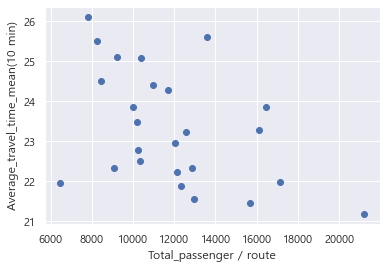

In [30]:
a2 = df['승차총승객수']/df['정류장수']
plt.scatter(a2, df['평균 이동 시간(분)_mean'])
plt.xlabel('Total_passenger / route')
plt.ylabel('Average_travel_time_mean(10 min)')
a21 = spst.pearsonr(a2, df['평균 이동 시간(분)_mean'])
a21

### 양의 상관관계가 나올줄 알았으나 음의 상관관계가 나왔다.
- 승객이 늘고, 정류장이 줄어들수록 평균 이동 시간이 줄어든다.
- 승차총승객수가 많다고 무작정 정류장을 늘리는 것은 답이 아님을 알 수 있다.
- (상관계수 : -0.45352924781086634, p-value : 0.02278553520964107)
- 유의확률 2.3% < 5% --> 예상했던 가설과는 반대였지만 연관이 있으므로 대립가설 채택

In [31]:
df['승차총승객수/정류장수'] = df['승차총승객수']/df['정류장수']
display(df.loc[:,['자치구','승차총승객수/정류장수', '평균 이동 시간(분)_mean']].sort_values(['승차총승객수/정류장수']))
print(df['평균 이동 시간(분)_mean'].mean())

,자치구,승차총승객수/정류장수,평균 이동 시간(분)_mean
3,성동구,6453.517241,21.950757
24,강동구,7832.121951,26.108477
15,강서구,8270.464664,25.496986
10,노원구,8469.445525,24.497542
13,마포구,9054.201068,22.322323
9,도봉구,9204.192201,25.102882
6,중랑구,9980.371053,23.849072
16,구로구,10169.129630,23.480408
4,광진구,10220.996283,22.779081
7,성북구,10359.508306,22.508757


23.33342421099137


결론 : 가설에 따라 솔루션을 도출한 결과 평균이동시간과 정류장수를 고려하여 평균이하의 평균이동시간 ( 평균이동시간의 평균 = 23.3 ) 을 가져 정류장을 늘리는 것에 큰 부담이 없고 승객수 대비 정류장 수가 가장 적은 성동구에 정류장을 늘려야 할 것으로 생각된다.

## 4.관계 정리

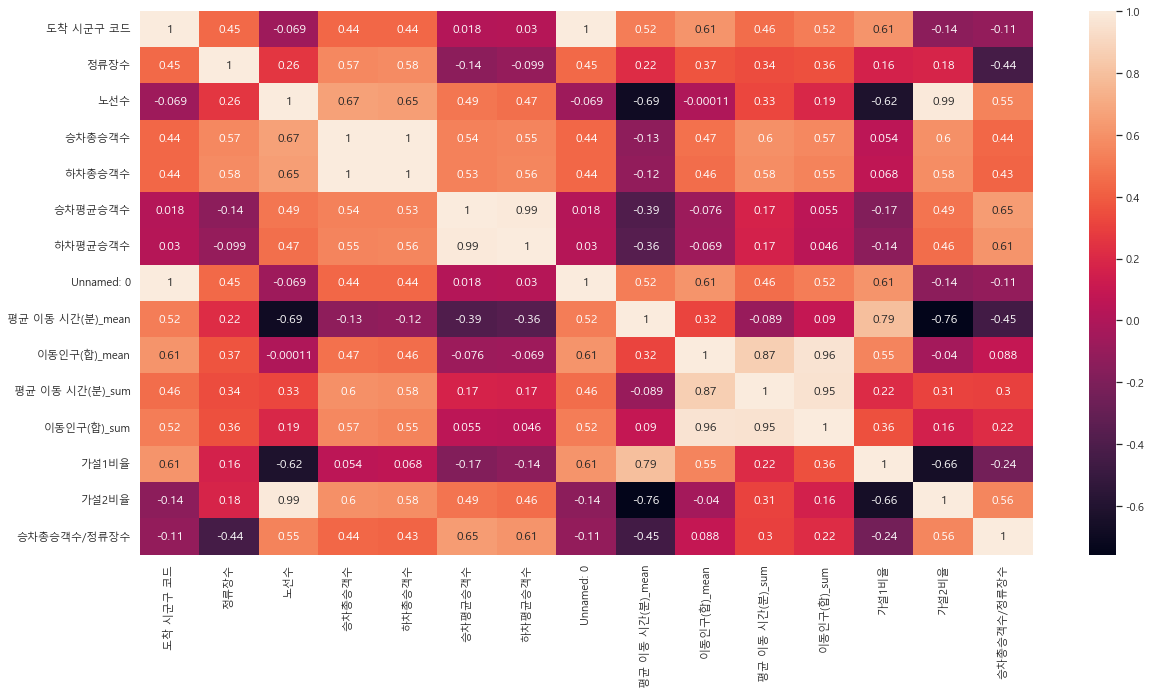

In [32]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

### 1) 강한 관계의 변수

* (승차총승객수 / 정류장수) ~ 평균 이동 시간_mean
* 승차 총 승객수 ~ 노선수
* 평균 이동 시간 ~ 노선수



### 2) 약한 관계의 변수

* 노선수 ~ 이동인구(합)_sum
* 정류장수 ~ 하차평균승객수


## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?

### (가설1)

- 강동구는 비슷한 승차총승객수를 가진 자치구에 비해 노선 수가 적어 보충이 필요해보입니다. 
- 송파구는 승차총승객수에 비해 노선이 적어 보충이 필요합니다

### (가설2)
- 평균 이동시간의 평균에 비해 노선수가 너무 적다.
- => 강동구(21개의 노선수)

### (가설3)
- 가설에 따라 솔루션을 도출한 결과 평균이동시간과 정류장수를 고려하여 평균이하의 평균이동시간 ( 평균이동시간의 평균 = 23.3 ) 을 가져 정류장을 늘리는 것에 큰 부담이 없고 승객수 대비 정류장 수가 가장 적은 성동구에 정류장을 늘려야 할 것으로 생각된다.

## 3개 가설 증명에서 중복적으로 나타나는 "강동구"에 노선 증설이 가장 필요하다.